In [4]:
import numpy as np
import pandas as pd

In [5]:
base = pd.read_csv('adult.csv')
base.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Remoção de colunas pouco relevantes
Capital gain e capital loss possuíam uma grande quantidade de valores iguais a 0. Native country possuía uma grande quantidade de valores iguais a "United States".

In [6]:
base1 = base.drop(['capital.gain', 'capital.loss','native.country'], axis=1)
base1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


## Categorização de variáveis

In [7]:
base1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
income            object
dtype: object

In [11]:
base1['workclass'] = base1['workclass'].astype('category')
base1['education'] = base1['education'].astype('category')
base1['marital.status'] = base1['marital.status'].astype('category')
base1['occupation'] = base1['occupation'].astype('category')
base1['relationship'] = base1['relationship'].astype('category')
base1['race'] = base1['race'].astype('category')
base1['sex'] = base1['sex'].astype('category')
base1['income'] = base1['income'].astype('category')
base1.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
hours.per.week       int64
income            category
dtype: object

In [12]:
base1['workclass'].cat.categories = ['Doesnt-work', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
base1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Doesnt-work,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,Doesnt-work,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


In [13]:
base1['occupation'].cat.categories = ['Doesnt-work', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving']
base1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Doesnt-work,77053,HS-grad,9,Widowed,Doesnt-work,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,Doesnt-work,186061,Some-college,10,Widowed,Doesnt-work,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


## Normalização de variáveis
Normalização das variáveis age, education.num e hours.per.week

In [14]:
base1['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [15]:
base1['age'] = (base1['age'] - base1['age'].min()) / (base1['age'].max() - base1['age'].min())
base1['age'].describe()

count    32561.000000
mean         0.295639
std          0.186855
min          0.000000
25%          0.150685
50%          0.273973
75%          0.424658
max          1.000000
Name: age, dtype: float64

In [16]:
base1['education.num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

In [17]:
base1['education.num'] = (base1['education.num'] - base1['education.num'].min()) / (base1['education.num'].max() - base1['education.num'].min())
base1['education.num'].describe()

count    32561.000000
mean         0.605379
std          0.171515
min          0.000000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
Name: education.num, dtype: float64

In [18]:
base1['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [19]:
base1['hours.per.week'] = (base1['hours.per.week'] - base1['hours.per.week'].min()) / (base1['hours.per.week'].max() - base1['hours.per.week'].min())
base1['hours.per.week'].describe()

count    32561.000000
mean         0.402423
std          0.125994
min          0.000000
25%          0.397959
50%          0.397959
75%          0.448980
max          1.000000
Name: hours.per.week, dtype: float64

## Remoção de outliers

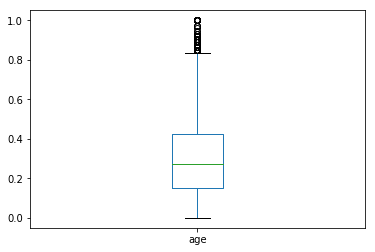

In [44]:
base1['age'].plot.box()

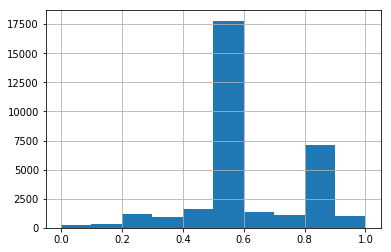

In [42]:
base1['age'].hist()

## Estatísticas descritivas com visualização


In [37]:
# média da idade masculina vs feminina
ageMale = base1[(base1['sex'] == 'Male')]['age'].mean()
ageFem = base1[(base1['sex'] == 'Female')]['age'].mean()
print(f'A idade média masculina é {ageMale} \n')
print(f'A idade média feminina é {ageFem} \n')

# média do tempo de estudo masculino vs feminino
edMale = base1[(base1['sex'] == 'Male')]['education.num'].mean()
edFem = base1[(base1['sex'] == 'Female')]['education.num'].mean()
print(f'O tempo de estudo médio masculino é {edMale} \n')
print(f'O tempo de estudo médio feminino é {edFem} \n')

# média do tempo de trabalho semanal masculino vs feminino
workMale = base1[(base1['sex'] == 'Male')]['hours.per.week'].mean()
workFem = base1[(base1['sex'] == 'Female')]['hours.per.week'].mean()
print(f'O tempo de trabalho por semana médio masculino é {workMale} \n')
print(f'O tempo de trabalho por semana médio feminino é {workFem} \n')

# média do tempo de trabalho semanal de pessoas que cursaram o ensino superior masculino vs feminino
workMaleBachelors = base1[(base1['sex'] == 'Male') & (base1['education'] == 'Bachelors')]['hours.per.week'].mean()
workFemBachelors = base1[(base1['sex'] == 'Female') & (base1['education'] == 'Bachelors')]['hours.per.week'].mean()
print(f'O tempo de trabalho por semana médio masculino com ensino superior é {workMaleBachelors} \n')
print(f'O tempo de trabalho por semana médio feminino com ensino superior é {workFemBachelors} \n')

# média do tempo de trabalho semanal de pessoas que não cursaram o ensino superior masculino vs feminino
workMaleHS = base1[(base1['sex'] == 'Male') & (base1['education'] == 'HS-grad')]['hours.per.week'].mean()
workFemHS = base1[(base1['sex'] == 'Female') & (base1['education'] == 'HS-grad')]['hours.per.week'].mean()
print(f'O tempo de trabalho por semana médio masculino sem ensino superior é {workMaleHS} \n')
print(f'O tempo de trabalho por semana médio feminino sem ensino superior é {workFemHS} \n')

# média do tempo de trabalho semanal de homens brancos vs negros
workMaleWhite = base1[(base1['sex'] == 'Male') & (base1['race'] == 'White')]['hours.per.week'].mean()
workMaleBlack = base1[(base1['sex'] == 'Male') & (base1['race'] == 'Black')]['hours.per.week'].mean()
print(f'O tempo de trabalho por semana médio masculino branco é {workMaleWhite} \n')
print(f'O tempo de trabalho por semana médio masculino negro é {workMaleBlack} \n')

# média de tempo de trabalho semanal de mulheres brancas vs negras
workFemWhite = base1[(base1['sex'] == 'Female') & (base1['race'] == 'White')]['hours.per.week'].mean()
workFemBlack = base1[(base1['sex'] == 'Female') & (base1['race'] == 'Black')]['hours.per.week'].mean()
print(f'O tempo de trabalho por semana médio masculino branco é {workFemWhite} \n')
print(f'O tempo de trabalho por semana médio masculino negro é {workFemBlack} \n')

A idade média masculina é 0.30730886984729955 

A idade média feminina é 0.272030553884548 

O tempo de estudo médio masculino é 0.6068594156340783 

O tempo de estudo médio feminino é 0.6023829418501111 

O tempo de trabalho por semana médio masculino é 0.4227355742663959 

O tempo de trabalho por semana médio feminino é 0.36133021586682557 

O tempo de trabalho por semana médio masculino com ensino superior é 0.4391578901367883 

O tempo de trabalho por semana médio feminino com ensino superior é 0.3911144445424922 

O tempo de trabalho por semana médio masculino sem ensino superior é 0.4232792540444392 

O tempo de trabalho por semana médio feminino sem ensino superior é 0.3630335319968786 

O tempo de trabalho por semana médio masculino branco é 0.42519206493481126 

O tempo de trabalho por semana médio masculino negro é 0.39793316944369284 

O tempo de trabalho por semana médio masculino branco é 0.36017031204981 

O tempo de trabalho por semana médio masculino negro é 0.365653914

In [56]:
doesntWork = len(base1[base1['occupation'] == 'Doesnt-work'])
femDoesntWork = len(base1[(base1['occupation'] == 'Doesnt-work') & (base1['sex'] == 'Female')])
maleDoesntWork = len(base1[(base1['occupation'] == 'Doesnt-work') & (base1['sex'] == 'Male')])
pfemdw = ( femDoesntWork / doesntWork ) * 100
pmaledw = ( maleDoesntWork / doesntWork ) * 100
print(f'O percentual de mulheres que não trabalham é {pfemdw} \n')
print(f'O percentual de homens que não trabalham é {pmaledw} \n')

femRetired = len(base1[(base1['occupation'] == 'Doesnt-work') & (base1['sex'] == 'Female') & (base1['age'] > ageFem)])
maleRetired = len(base1[(base1['occupation'] == 'Doesnt-work') & (base1['sex'] == 'Male') & (base1['age'] > ageMale)])
pfemr = (femRetired / femDoesntWork) * 100
pmaler = (maleRetired / maleDoesntWork) * 100
print(f'O percentual de mulheres aposentadas é {pfemr} \n')
print(f'O percentual de homens aposentados é {pmaler} \n')

totalIncome = len(base1[base1['income'] == '>50K'])
mIncome = len(base1[(base1['sex'] == 'Male') & (base1['income'] == '>50K')])
fIncome = len(base1[(base1['sex'] == 'Female') & (base1['income'] == '>50K')])
pmincome = (mIncome/totalIncome) * 100
pfincome = (fIncome/totalIncome) * 100
print(f'O percentual de homens que recebem mais de 50K é {pmincome}\n')
print(f'O percentual de mulheres que recebem mais de 50K é {pfincome}\n')

O percentual de mulheres que não trabalham é 45.63212154096581 

O percentual de homens que não trabalham é 54.36787845903418 

O percentual de mulheres aposentadas é 36.86087990487515 

O percentual de homens aposentados é 54.39121756487027 

O percentual de homens que recebem mais de 50K é 84.96365259533223

O percentual de mulheres que recebem mais de 50K é 15.036347404667772



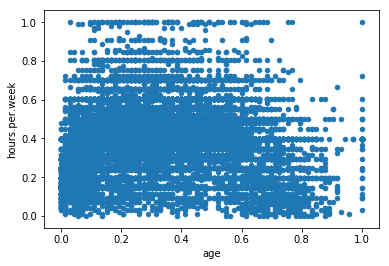

In [58]:
base1.plot.scatter(x='age', y='hours.per.week')

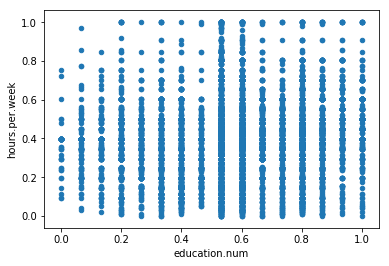

In [57]:
base1.plot.scatter(x='education.num', y ='hours.per.week')

In [59]:
base1.cov()

,age,fnlwgt,education.num,hours.per.week
age,0.034915,-1.511653e+03,0.001171,0.001619
fnlwgt,-1511.653223,1.114080e+10,-781.968487,-249.596186
education.num,0.001171,-7.819685e+02,0.029417,0.003201
hours.per.week,0.001619,-2.495962e+02,0.003201,0.015875


## Testes de hipótese